# Final Product

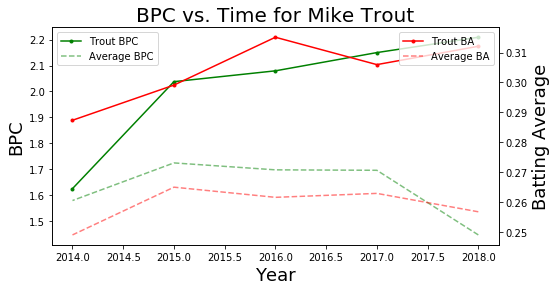

In [238]:
query("Mike,Trout")

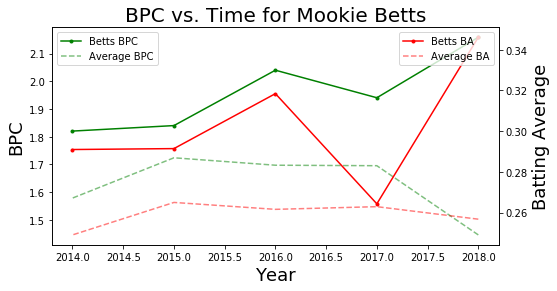

In [239]:
query("Mookie,Betts")

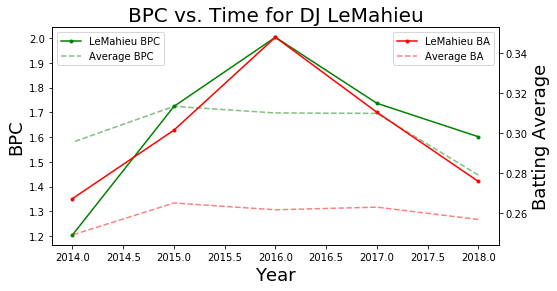

In [232]:
query("DJ,LeMahieu")

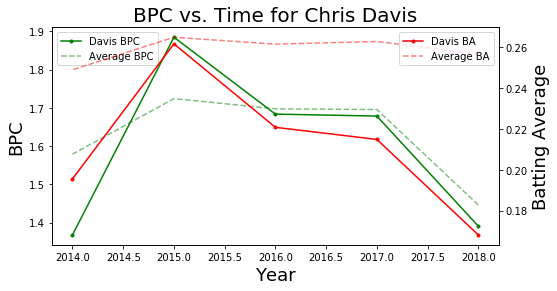

In [231]:
query("Chris,Davis")

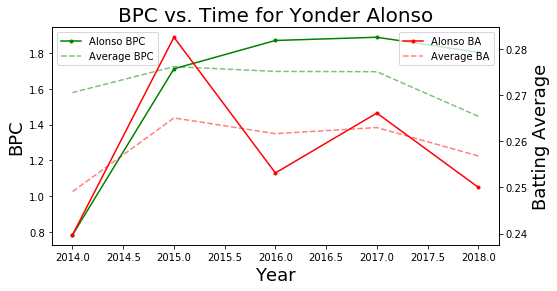

In [237]:
query('RANDOM')

## Code

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

bpc = pd.read_csv("data/BPC.csv")
bpc = bpc.sort_values("yearID", ascending=False)

In [223]:
means = []
meansba = []
for year in range(2014, 2019):
    means.append(bpc.loc[bpc["yearID"] == year, "bpcsum"].mean())
    meansba.append(bpc.loc[bpc["yearID"] == year, "BA"].mean())
def get_player():
    names = list(set(bpc["name"]))
    np.random.shuffle(names)
    return names[16]
yeh = ""
def query(name):
    if name == "RANDOM":
        name = get_player()
    data = bpc.loc[bpc["name"] == name]
    if len(data) == 0:
        print("Player not found\nEnter RANDOM if you want to see a random player's stats")
        return
    fig, ax = plt.subplots(figsize=(8,4))
    f,l = name.split(",")
    ax.plot(data["yearID"], data["bpcsum"], label=f"{l} BPC",color="g", marker=".")
    ax.plot(data["yearID"],means, label="Average BPC", alpha=0.5,linestyle="--", color="g")
    ax2 = ax.twinx()
    ax2.plot(data["yearID"],data["BA"], label=f"{l} BA", color="red", marker=".")
    ax2.plot(data["yearID"],meansba, label="Average BA", alpha=0.5,linestyle="--",  color="r")
    ax.set_title(f"BPC vs. Time for {f} {l}",size=20)
    ax.set_ylabel("BPC", size=18)
    ax.set_xlabel("Year", size=18)
    ax.legend(loc=2, fancybox=True)

    ax2.legend(loc=1,fancybox=True)
    ax2.set_ylabel("Batting Average", size=18)